In [9]:
clc; clear; 
close all;
pkg load image;
available_graphics_toolkits()
graphics_toolkit ("gnuplot");



ans =
{
  [1,1] = fltk
  [1,2] = gnuplot
}



In [54]:
I_color = imread("WingedFigure.jpg");
I_color = imresize(I_color, [50 50]);
size(I_color)

ans =

   50   50    3



In [284]:
function [transformed_image] = image_transformation_2x2(I_color)
[M N ~] = size(I_color);
transformed_image = zeros(2*M,2*N);
for i = 1:M
    for j = 1:N
        I=0.3*I_color(i,j,1)+0.59*I_color(i,j,2)+0.11*I_color(i,j,3);
        transformed_image((2*i-1):(2*i) , (2*j-1):(2*j))=[I I_color(i,j,1) ; I_color(i,j,2) I_color(i,j,3)];
    end
end
transformed_image = uint8(transformed_image);
endfunction


function [original_image] = image_transformation_2x2_inverse(transformed_image)
[M N ~] = size(transformed_image);
I_color = zeros(M/2,N/2,3);
for i = 1:M/2
    for j = 1:N/2
        I_color(i,j,1)=transformed_image((2*i-1):(2*i) , (2*j-1):(2*j))(1,2);
        I_color(i,j,2)=transformed_image((2*i-1):(2*i) , (2*j-1):(2*j))(2,1);
        I_color(i,j,3)=transformed_image((2*i-1):(2*i) , (2*j-1):(2*j))(2,2);
    end
end
original_image = uint8(I_color);
endfunction



function [transformed_image] = image_transformation_2x3(I_color)
[M N ~] = size(I_color);
transformed_image = zeros(2*M,(3*N/2));
for i = 1:M
    for j = 1:2:N
        current_j=(j+1)/2;
        new_block=zeros(2,3);
        new_block(1,:)=[I_color(i,j,1), I_color(i,j,2), I_color(i,j+1,3)];
        new_block(2,:)=[I_color(i,j,3), I_color(i,j+1,1), I_color(i,j+1,2)];
        transformed_image((2*i-1):(2*i) , (3*(current_j)-2):(3*current_j))=new_block;
    end
end
transformed_image=uint8(transformed_image);
endfunction

function [original_image] = image_transformation_2x3_inverse(transformed_image)
[M N ~] = size(transformed_image);
I_color = zeros(M/2,N/3*2,3);
for i = 1:M/2
    for j = 1:N/3
        current_j=(j+1)/2;
        new_block=transformed_image((2*i-1):(2*i) , (3*(current_j)-2):(3*current_j));
        I_color(i,j,1)=new_block(1,1);
        I_color(i,j,2)=new_block(1,2);
        I_color(i,j+1,3)=new_block(1,3);
        I_color(i,j,3) = new_block(2,1);
        I_color(i,j+1,1) = new_block(2,2);
        I_color(i,j+1,2) = new_block(2,3);
    end
end
original_image = uint8(I_color);
endfunction


function [transformed_image] = image_transformation_4x1(I_color)
[M N ~] = size(I_color);
transformed_image = zeros(4*M,N);
for i = 1:M
    for j = 1:N
        I=0.3*I_color(i,j,1)+0.59*I_color(i,j,2)+0.11*I_color(i,j,3);
        transformed_image((4*i-3):(4*i) , j)=[I I_color(i,j,1)  I_color(i,j,2) I_color(i,j,3)];
    end
end
transformed_image = uint8(transformed_image);
endfunction


function [original_image] = image_transformation_4x1_inverse(transformed_image)
[M N ~] = size(transformed_image);
I_color = zeros(M/4,N,3);
for i = 1:M/4
    for j = 1:N
        I_color(i,j,1)=transformed_image((4*i-3):(4*i) , j)(2,1);
        I_color(i,j,2)=transformed_image((4*i-3):(4*i) , j)(3,1);
        I_color(i,j,3)=transformed_image((4*i-3):(4*i) , j)(4,1);
    end
end
original_image = uint8(I_color);
endfunction

function [transformed_image] = image_transformation_1x4(I_color)
[M N ~] = size(I_color);
transformed_image = zeros(M,4*N);
for i = 1:M
    for j = 1:N
        I=0.3*I_color(i,j,1)+0.59*I_color(i,j,2)+0.11*I_color(i,j,3);
        transformed_image(i,(4*j-3):(4*j))=[I I_color(i,j,1)  I_color(i,j,2) I_color(i,j,3)];
    end
end 
transformed_image = uint8(transformed_image);
endfunction

function [original_image] = image_transformation_1x4_inverse(transformed_image)
[M N ~] = size(transformed_image);
I_color = zeros(M,N/4,3);
for i = 1:M
    for j = 1:N/4
        I_color(i,j,1)=transformed_image(i,(4*j-3):(4*j))(1,2);
        I_color(i,j,2)=transformed_image(i,(4*j-3):(4*j))(1,3);
        I_color(i,j,3)=transformed_image(i,(4*j-3):(4*j))(1,4);
    end
end
original_image = uint8(I_color);
endfunction


function [result_2x2 result_2x3 result_4x1 result_1x4] = image_transformation_all(I_color)  %all transformations
result_2x2 = image_transformation_2x2(I_color);
result_2x3 = image_transformation_2x3(I_color);
result_4x1 = image_transformation_4x1(I_color);
result_1x4 = image_transformation_1x4(I_color);
endfunction



% plot 5 images
function  plot_Transformation_models(I_color)
[result_2x2 result_2x3 result_4x1 result_1x4] = image_transformation_all(I_color);
figure;
subplot(2,3,1);
imshow(I_color);
title("Original");
subplot(2,3,2);
imshow(result_2x2);
title("2x2");
subplot(2,3,3);
imshow(result_2x3);
title("2x3");
subplot(2,3,4);
imshow(result_4x1);
title("4x1");
subplot(2,3,5);
imshow(result_1x4);
title("1x4");
endfunction


function result_img = alpha_root_enhancement(input_img, alpha_value=0.5)
img_freq = fft2(input_img);
img_angles = angle(img_freq);
img_magnitude = abs(img_freq);
alpha_root=(img_magnitude.^alpha_value).*(e.^(1i*img_angles));
result_img = real(ifft2(alpha_root));
result_img = uint8(result_img);
endfunction

function [alpha_root_2x2 alpha_root_2x3 alpha_root_4x1 alpha_root_1x4] = alpha_root_enhancement_all(I_color, alpha_value=0.5)
[result_2x2 result_2x3 result_4x1 result_1x4] = image_transformation_all(I_color);
alpha_root_2x2 = alpha_root_enhancement(result_2x2, alpha_value);
alpha_root_2x3 = alpha_root_enhancement(result_2x3, alpha_value);
alpha_root_4x1 = alpha_root_enhancement(result_4x1, alpha_value);
alpha_root_1x4 = alpha_root_enhancement(result_1x4, alpha_value);
alpha_root_2x2 = image_transformation_2x2_inverse(alpha_root_2x2);
alpha_root_2x3 = image_transformation_2x3_inverse(alpha_root_2x3);
alpha_root_4x1 = image_transformation_4x1_inverse(alpha_root_4x1);
alpha_root_1x4 = image_transformation_1x4_inverse(alpha_root_1x4);
endfunction


function  check_transformations()
% check transformations
input_img_test = zeros(5,5,3);
input_img_test(:,:,1) = reshape(1:25,[5 5]);
input_img_test(:,:,2) = reshape(26:26+24,[5 5]);
input_img_test(:,:,3) = reshape(26+25:26+49,[5 5]);
[M,N,~] = size(input_img_test);
input_img_test = input_img_test(M-mod(M,2):M,N-mod(N,2):N,:);
input_img_test;
% isequal(input_img_test,input_img_test_2)

result_2x2 = image_transformation_2x2(input_img_test);
result_2x2_inverse = image_transformation_2x2_inverse(result_2x2);
isequal(input_img_test,result_2x2_inverse)

result_2x3 = image_transformation_2x3(input_img_test);
result_2x3_inverse = image_transformation_2x3_inverse(result_2x3);
isequal(input_img_test,result_2x3_inverse)

result_4x1 = image_transformation_4x1(input_img_test);
result_4x1_inverse = image_transformation_4x1_inverse(result_4x1);
isequal(input_img_test,result_4x1_inverse)

result_1x4 = image_transformation_1x4(input_img_test);
result_1x4_inverse = image_transformation_1x4_inverse(result_1x4);
isequal(input_img_test,result_1x4_inverse)
endfunction

function  plot_alpha_root_enhancement_models(I_color, alpha_value=0.5)
[alpha_root_2x2 alpha_root_2x3 alpha_root_4x1 alpha_root_1x4] = alpha_root_enhancement_all(I_color, alpha_value);
figure;
subplot(2,3,1);
imshow(I_color);
title("Original");
subplot(2,3,2);
imshow(alpha_root_2x2);
title("2x2");
subplot(2,3,3);
imshow(alpha_root_2x3);
title("2x3");
subplot(2,3,4);
imshow(alpha_root_4x1);
title("4x1");
subplot(2,3,5);
imshow(alpha_root_1x4);
title("1x4");
endfunction





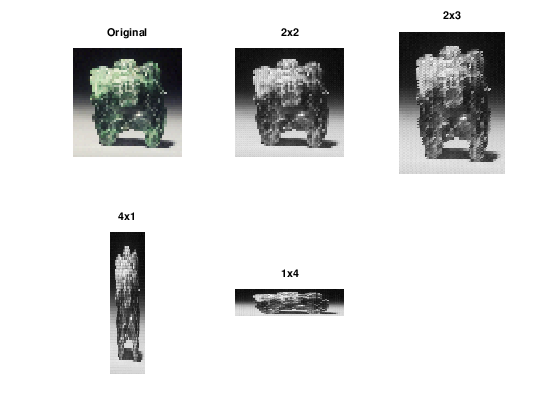

In [274]:
plot_Transformation_models(I_color);

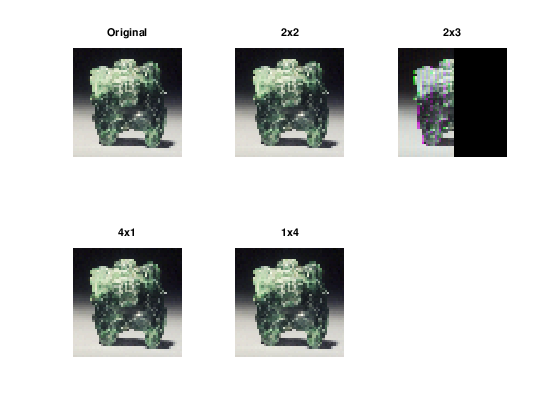

In [286]:

plot_alpha_root_enhancement_models(I_color,1);


In [285]:
[alpha_root_2x2 alpha_root_2x3 alpha_root_4x1 alpha_root_1x4] = alpha_root_enhancement_all(I_color, alpha_value=0.5);
